## **1. Import Library**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold 

Using TensorFlow backend.


## **2. Load Data**

In [2]:
iris = pd.read_csv('iris.csv')
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


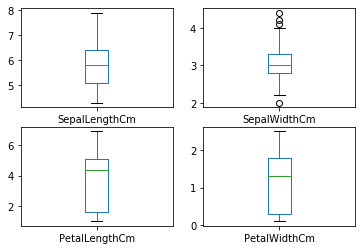

In [5]:
# Box and whisker plots(Give idea about distribution of input attributes)
iris.plot(kind = 'box', subplots = True, layout = (2, 2), sharex = False, sharey = False)
plt.show()

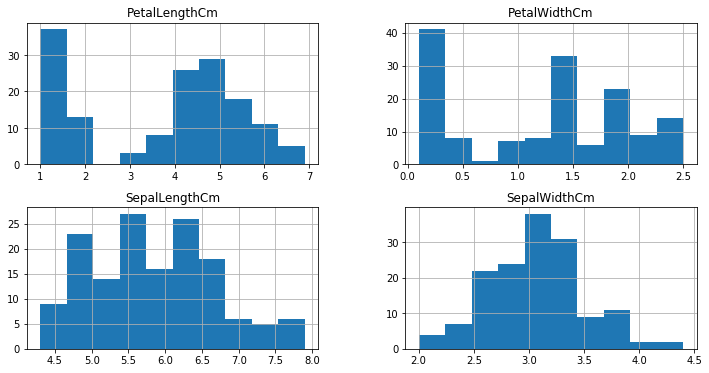

In [6]:
# Histograms of distribution of input attributes
iris.hist()
his = plt.gcf()
his.set_size_inches(12, 6)
plt.show()

## **3. Membuat Arsitektur Jaringan dan Model**

In [3]:
X= iris.iloc[:, 0:4].values
y= iris.iloc[:,4].values

# Label encode Class (Species)
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# One Hot Encode
y_dummy = np_utils.to_categorical(encoded_y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_dummy, test_size = 0.2, random_state = 0)

In [5]:
# Membuat Arsitektur Jaringan
model = tf.keras.Sequential()
# hidden layers pertama dengan menggunakan relu
model.add(tf.keras.layers.Dense(8, activation='relu',input_shape=(4,)))

#membuat output
model.add(tf.keras.layers.Dense(3, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train,epochs=100, batch_size=6, verbose = 0)

In [6]:
# Lihat nilai Accuracy dan Loss nya
loss, accuracy = model.evaluate (X_test, y_test, verbose = 0)
print ("Accuracy: {} %".format(accuracy*100))
print ("Loss: {}".format(loss))

Accuracy: 96.66666388511658 %
Loss: 0.20559416711330414


**Terlihat bahwa dengan Arsitektur Jaringan seperti diatas, maka didapatkan Accuracy sebesar 96.67%**

## 4. Arsitektur Jaringan Lain tanpa menggunakan train_test_split

 Sebelum menjalankan, restart Kernel Terlebih dahulu

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold 

Using TensorFlow backend.


In [2]:
iris = pd.read_csv('iris.csv')
iris.head(10)

X= iris.iloc[:, 0:4].values
y= iris.iloc[:,4].values

# Label encode Class (Species)
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# One Hot Encode
y_dummy = np_utils.to_categorical(encoded_y)

# Membuat Arsitektur Jaringan
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu',input_shape=(4,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

 
H = model.fit(X, y_dummy,epochs=100, batch_size=6, verbose = 0)

# Lihat nilai Accuracy dan Loss nya
loss, accuracy = model.evaluate (X, y_dummy, verbose = 0)
print ("Accuracy: {} %".format(accuracy*100))
print ("Loss: {}".format(loss))

Accuracy: 98.66666793823242 %
Loss: 0.0607448567636311


**Terlihat bahwa dengan Arsitektur Jaringan seperti diatas, maka didapatkan Accuracy sebesar 98.00%**

## 5. Menggunakan K-Fold Cross Validation 

 Sebelum menjalankan, restart Kernel Terlebih dahulu

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold 

In [3]:
iris = pd.read_csv('iris.csv')
iris.head(10)

X= iris.iloc[:, 0:4].values
y= iris.iloc[:,4].values

# Label encode Class (Species)
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# One Hot Encode
y_dummy = np_utils.to_categorical(encoded_y)

# Membuat Arsitektur Jaringan
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu',input_shape=(4,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 10-folds cross validation
H = model.fit(X, y_dummy,epochs=200, batch_size=6, validation_split=0.1, verbose = 0)

# Lihat nilai Accuracy dan Loss nya
loss, accuracy = model.evaluate (X, y_dummy, verbose = 0)
print ("Accuracy: {} %".format(accuracy*100))
print ("Loss: {}".format(loss))

Accuracy: 98.66666793823242 %
Loss: 0.045901562817016385


**Terlihat bahwa dengan Arsitektur Jaringan seperti diatas, dan menggunakan K-FOLD cross validation maka didapatkan Accuracy sebesar 98.67% sama seperti arsitektur jaringan sebelumnya, hanya saja nilai loss nya menurun dari 0.060 menjadi 0.045**